# Практическое задание к уроку 8 часть 1

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold

#### 1. Скачать любой понравившийся вам датасет с UCI repository(можете даже свой какой-то взять) и сразу же разделите его на тренировочную и тестовую выборки. Тестовую выборку сохраните на диск и больше не трогайте.

Heart failure clinical records Data Set

https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

In [2]:
data=pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null float64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
time                        299 non-null int64
DEATH_EVENT                 299 non-null int64
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


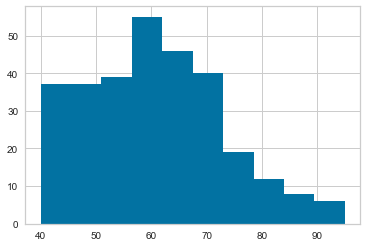

In [4]:
data.age.hist()

In [5]:
print(data.shape)
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\nFeatures : \n" ,data.columns.tolist())
print ("\nMissing values :  ", data.isnull().sum().values.sum())
print ("\nUnique values :  \n",data.nunique())
data.head()

(299, 13)
Rows     :  299
Columns  :  13

Features : 
 ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']

Missing values :   0

Unique values :  
 age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
from sklearn.model_selection import train_test_split

features = data.columns.drop('DEATH_EVENT')
target = 'DEATH_EVENT'

X_train, X_test, y_train, y_test = train_test_split(data[features], 
                                                    data[target], test_size=0.33, random_state=42)
#save test
X_test.to_csv("X_test_lesson_8.csv", index=None)
y_test.to_csv("y_test_lesson_8.csv", index=None)
#save train
X_train.to_csv("X_train_lesson_8.csv", index=None)
y_train.to_csv("y_train_lesson_8.csv", index=None)
X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
101,75.0,0,582,0,45,1,263358.03,1.18,137,1,0,87
69,65.0,0,113,1,25,0,497000.00,1.83,135,1,0,67
31,85.0,0,23,0,45,0,360000.00,3.00,132,1,0,28
172,70.0,1,171,0,60,1,176000.00,1.10,145,1,1,146
148,75.0,1,582,0,30,0,225000.00,1.83,134,1,0,113


### EDA

In [7]:
def eda(data_set,target,column):
    churn     = data_set[data_set[target] == 1]
    not_churn = data_set[data_set[target] == 0]
   
    #labels
    lab = data_set[target].value_counts().keys().tolist()
    #values
    val = data_set[target].value_counts().values.tolist()

    trace = go.Pie(labels = lab ,
                   values = val ,
                   marker = dict(colors =  [ 'royalblue' ,'lime'],
                                 line = dict(color = "white",
                                             width =  1.3)
                                ),
                   rotation = 90,
                   hoverinfo = "label+value+text",
                   hole = .5
                  )
    layout = go.Layout(dict(title = "Customer attrition in data",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                           )
                      )

    data = [trace]
    fig = go.Figure(data = data,layout = layout)
    py.iplot(fig)


    for i in column :
        plot_pie(i,churn,not_churn)
    
    for i in column :
        histogram(i,churn,not_churn)     

    
    #function  for pie plot for customer attrition types
def plot_pie(column,churn,not_churn) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "DEATH_EVENT",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non DEATH_EVENT" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "DEATH_EVENT",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non DEATH_EVENT",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)

def histogram(column,churn,not_churn) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Risk Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non Risk customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)


In [8]:
eda(data,target,['anaemia','diabetes','ejection_fraction',
                 'high_blood_pressure','serum_sodium',
                 'sex','smoking'])

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    


def create_Pipeline(data_set,key):
    p_line =  Pipeline([
                    ('selector', NumberSelector(key=key)),
                    ('standard', StandardScaler())  ### стандарт скалер тут особо не нужен (введен для обработчика)
                ])

    p_line.fit_transform(data_set)
    return p_line


In [10]:
columns=['age','creatinine_phosphokinase',
         'ejection_fraction','platelets',
         'serum_creatinine','serum_sodium',
         'time']
p_line=[]
for column in columns:
    p_line.append([column,create_Pipeline(X_train,column)])

In [11]:
#columns_b=X_train.columns.drop(columns)
#for column in columns_b:
#    p_line.append([column,create_Pipeline(X_train,column)])

In [12]:
from sklearn.pipeline import FeatureUnion

feats = FeatureUnion(p_line)

feature_processing = Pipeline([('feats', feats)])
feature_processing.fit_transform(X_train)

array([[ 1.27993208e+00, -8.12177301e-04,  5.49747992e-01, ...,
        -2.01866257e-01,  8.82157429e-02, -6.03665540e-01],
       [ 3.91809798e-01, -4.98735254e-01, -1.16687337e+00, ...,
         4.37573640e-01, -3.76077641e-01, -8.62001065e-01],
       [ 2.16805436e+00, -5.94285525e-01,  5.49747992e-01, ...,
         1.58856546e+00, -1.07251772e+00, -1.36575534e+00],
       ...,
       [-4.96312483e-01,  1.75424989e-01,  5.49747992e-01, ...,
        -8.38158142e-02,  8.82157429e-02, -5.90748763e-01],
       [-1.47324699e+00, -8.12177301e-04, -7.37718032e-01, ...,
         2.11310292e-01, -1.53681110e+00,  1.42426834e+00],
       [ 1.72399322e+00,  3.34675440e-01, -1.16687337e+00, ...,
        -2.80566552e-01,  1.71324259e+00, -6.03665540e-01]])

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

pipeline = Pipeline([
    ('features',feats),
    ('classifier', GradientBoostingClassifier(random_state = 42)),
])

pipeline.fit(X_train, y_train)

preds = pipeline.predict(X_test)
np.mean(preds == y_test)

0.7171717171717171

In [14]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

clt= xgb.XGBClassifier()
pipeline = Pipeline([
    ('features',feats),
    ('classifier', clt),
])

hyperparameters = { 'classifier__max_depth': [3, 5],
                    'classifier__subsample': [0.3, 0.4, 0.6],
                    'classifier__n_estimators': [200, 300],
                  }
clf = GridSearchCV(pipeline, hyperparameters, cv=3)
 
# Fit and tune model
clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('age',
                                                                        Pipeline(steps=[('selector',
                                                                                         NumberSelector(key='age')),
                                                                                        ('standard',
                                                                                         StandardScaler())])),
                                                                       ('creatinine_phosphokinase',
                                                                        Pipeline(steps=[('selector',
                                                                                         NumberSelector(key='creatinine_phosphokinase')),
                                                                                 

In [15]:
from sklearn.model_selection import cross_validate
from pprint import pprint



pipeline.set_params(classifier=clt)
scores = cross_validate(pipeline, X_train, y_train, scoring='roc_auc', cv=3)

In [16]:
scores

{'fit_time': array([0.12552118, 0.14046431, 0.29985619]),
 'score_time': array([0.07272267, 0.03586292, 0.03685927]),
 'test_score': array([0.8877551 , 0.94444444, 0.92476852])}

In [17]:
clf.best_params_

{'classifier__max_depth': 3,
 'classifier__n_estimators': 200,
 'classifier__subsample': 0.3}

In [18]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('age',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='age')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('creatinine_phosphokinase',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='creatinine_phosphokinase')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('ejection_fraction',
                                                 Pipeline(steps=[('sele

In [21]:
def graf_prediction(algorithm, training_x, training_y, testing_x,testing_y,predictions, 
                             probabilities ,cf,threshold_plot):
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()


 Classification report : 
               precision    recall  f1-score   support

           0       0.73      0.89      0.80        57
           1       0.79      0.55      0.65        42

    accuracy                           0.75        99
   macro avg       0.76      0.72      0.73        99
weighted avg       0.76      0.75      0.74        99

Accuracy   Score :  0.7474747474747475
Area under curve :  0.7211779448621555 



e:\anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



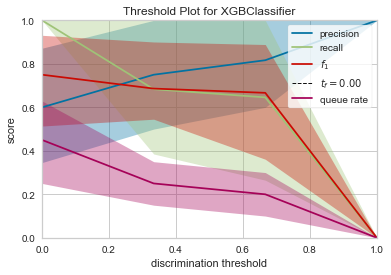

In [22]:
graf_prediction(pipeline.steps[1][1], pipeline[0].transform(X_train), y_train,
                         X_test,y_test,pipeline.predict(X_test), pipeline.predict_proba(X_test),
                         "coefficients",threshold_plot = True)

In [22]:
import dill

In [23]:
with open("model_trained_XGB.dill", "wb") as f:
    dill.dump(pipeline, f)